Splitting data
---

In [1]:
import pandas as pd

# Load the data
data_df = pd.read_csv('electric-cars.csv')

# First five rows
data_df.head()

,Temperature [°F],Energy Consumption [Wh/mil]
0,-15,460
1,-12,398
2,-8,460
3,-7,540
4,-6,347


In [2]:
import numpy as np

# Generate a list of indexes
n = len(data_df)
indexes = np.arange(n)

print('indexes:', indexes)

indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]


In [3]:
# Split into train/test indexes
split_idx = int(n*0.7)
train_idx = indexes[:split_idx]
test_idx = indexes[split_idx:]

print('train indexes:', train_idx)
print('test indexes:', test_idx)

train indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
test indexes: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56]


In [4]:
# Extract x, y data
x = data_df.iloc[:, 0].values # Temperatures
y = data_df.iloc[:, 1].values # Consumption

# Split data
x_tr, y_tr = x[train_idx], y[train_idx]
x_te, y_te = x[test_idx], y[test_idx]

print('train:', x_tr.shape, y_tr.shape)
print('test:', x_te.shape, y_te.shape)

train: (39,) (39,)
test: (18,) (18,)


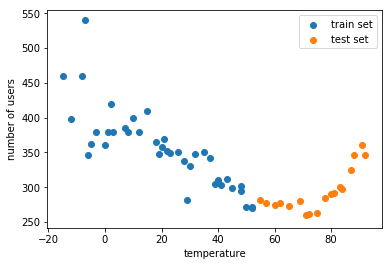

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot data points
plt.scatter(x_tr, y_tr, label='train set')
plt.scatter(x_te, y_te, label='test set')
plt.xlabel('temperature')
plt.ylabel('number of users')
plt.legend()
plt.show()

In [6]:
# shuffle the indexes
np.random.shuffle(indexes)

print('indexes:', indexes) # result depends on the seed

indexes: [37 34  6  3  2 21  9 25 54 49 50 28 40 36 11  5 17 56  1 52 38 51 39 23
 20 35 41 47 13 19 43 16 53 44 12  4  0 26 14 30 10 27 42 55 46  8 32 45
 24  7 29 33 48 15 22 31 18]


In [7]:
# Create the indexes
indexes = np.arange(n)

# Shuffle the indexes
np.random.seed(0)
np.random.shuffle(indexes)

print('indexes:', indexes) # [35 34 41 27 11 ..]

indexes: [35 34 41 27 11  2 33 56 22 55  4 10 29 50 32 40 37  7 14 31 28 46 51 18
 54 26 15  5 30 16 48 20 49  8 13 25 17 42 45 38  1 12 43 24  6 23 36 21
 19  9 39 52  3  0 53 47 44]


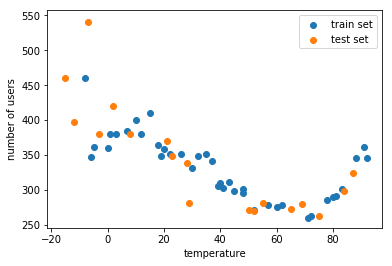

In [8]:
# Split into train/test indexes
split_idx = int(n*0.7)
train_idx = indexes[:split_idx]
test_idx = indexes[split_idx:]

# Split data
x_tr, y_tr = x[train_idx], y[train_idx]
x_te, y_te = x[test_idx], y[test_idx]

# Plot data points
plt.scatter(x_tr, y_tr, label='train set')
plt.scatter(x_te, y_te, label='test set')
plt.xlabel('temperature')
plt.ylabel('number of users')
plt.legend()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

# Split data
x_tr, x_te, y_tr, y_te = train_test_split(
    x, y, train_size=0.7, test_size=0.3, random_state=0)

In [10]:
from sklearn.model_selection import train_test_split

# Split data
x_tr, x_te, y_tr, y_te = train_test_split(
    x, y, train_size=39, test_size=18, random_state=0)

In [11]:
from sklearn.metrics import mean_squared_error as mse

# Polynomial regressions of degree 5 and 10
coef5 = np.polyfit(x_tr, y_tr, deg=5)
coef10 = np.polyfit(x_tr, y_tr, deg=10)

# Evaluate performance
y_pred5_tr = np.polyval(coef5, x_tr)
y_pred5_te = np.polyval(coef5, x_te)

print('Degree 5 MSE: {:.0f} (train) vs {:.0f} (test)'.format(
    mse(y_tr, y_pred5_tr),
    mse(y_te, y_pred5_te)
))
# Degree 5 MSE: 719 (train) vs 651 (test)

y_pred10_tr = np.polyval(coef10, x_tr)
y_pred10_te = np.polyval(coef10, x_te)

print('Degree 10 MSE: {:.0f} (train) vs {:.0f} (test)'.format(
    mse(y_tr, y_pred10_tr),
    mse(y_te, y_pred10_te)
))
# Degree 10 MSE: 707 (train) vs 1218 (test)

Degree 5 MSE: 719 (train) vs 651 (test)
Degree 10 MSE: 707 (train) vs 1218 (test)
